    1. Load the dataset of your choice
        - Earth Surface Temperature Data since year 1750
    
    2. Explain how the dataset is composed, define a task for this dataset
        - Dataset has few different versions, temp. for city, major city, country, state, and global.
        - Temperatures are monthly averages.
        - This is a timeseries data and there is only one feature (avg. temp.)
            - There is also a column for avg. temp. uncertainty
    
    3. Take a look at the detail of the data (plot some visualization, look how the features are encoded etc..)
    
    4. Clean/preprocess the data, separate train and test
    
    5. Try at least two different models for the task and decide which one is best
        - Linear Regression
        - GLM with gamma regressor
        - SVM for outlier/anomaly detection and regression (SVR)
    
    6. Fine-tune the hyperparameter of your model (i.e. with grid-search cv)
    
    7. Train the model with the best hyper parameter on all the training set
    
    8. Test the model on the test data, never touched before
    
    9. Present your model and explain its performance.

In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import os

import pandas as pd

In [3]:
climate = pd.read_csv("archive/GlobalLandTemperaturesByCountry.csv")

In [4]:
climate_pol = climate.loc[climate['Country']=='Poland']
climate_pol = climate_pol.dropna()
climate_pol

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
413621,1743-11-01,3.937,2.057,Poland
413626,1744-04-01,8.889,3.110,Poland
413627,1744-05-01,11.952,1.839,Poland
413628,1744-06-01,14.867,1.799,Poland
413629,1744-07-01,17.313,1.803,Poland
...,...,...,...,...
416854,2013-04-01,8.173,0.279,Poland
416855,2013-05-01,14.957,0.232,Poland
416856,2013-06-01,17.811,0.209,Poland
416857,2013-07-01,19.584,0.417,Poland


<AxesSubplot: xlabel='dt', ylabel='AverageTemperature'>

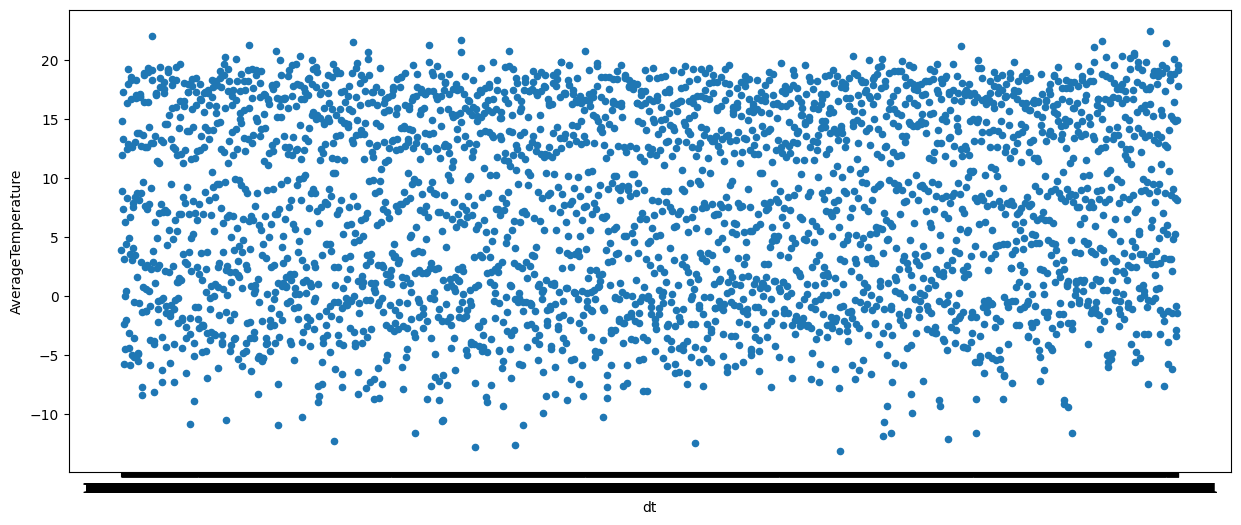

In [5]:
# plt.figure(figsize=(15,6))
climate_pol.plot(x='dt', y='AverageTemperature', kind = 'scatter', figsize=(15,6))

#counting outliers by decades
#divide month by month on x axis

In [6]:
# average yearly temperatures
climate_pol['dt'] = pd.to_datetime(climate_pol['dt'])
climate_pol['year'] = climate_pol['dt'].dt.year
climate_pol.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
413621,1743-11-01,3.937,2.057,Poland,1743
413626,1744-04-01,8.889,3.110,Poland,1744
413627,1744-05-01,11.952,1.839,Poland,1744
413628,1744-06-01,14.867,1.799,Poland,1744
413629,1744-07-01,17.313,1.803,Poland,1744


In [7]:
years = climate_pol.groupby(by=['year']).count()

not_full_years =  climate_pol['year'].value_counts() < 12
not_full_years = not_full_years[not_full_years==True]
# not_full_years = not_full_years.index
# not_full_years.tolist()

not_full_years = not_full_years.index.tolist()
not_full_years


years = climate_pol.drop(climate_pol[climate_pol.year.isin(not_full_years)].index)
years
# years = climate_pol['year'].drop(index=not_full_years)



,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
413731,1753-01-01,-5.154,7.416,Poland,1753
413732,1753-02-01,-3.524,3.255,Poland,1753
413733,1753-03-01,3.531,3.344,Poland,1753
413734,1753-04-01,8.401,6.348,Poland,1753
413735,1753-05-01,13.091,2.155,Poland,1753
...,...,...,...,...,...
416846,2012-08-01,18.870,0.329,Poland,2012
416847,2012-09-01,14.813,0.203,Poland,2012
416848,2012-10-01,8.361,0.193,Poland,2012
416849,2012-11-01,5.309,0.286,Poland,2012


In [8]:
years_grouped = years.groupby(['year'])['AverageTemperature'].mean()
years_grouped = years_grouped.to_frame()
years_grouped

,AverageTemperature
year,
1753,7.262833
1754,7.148000
1755,6.966333
1756,7.976417
1757,7.746000
...,...
2008,9.469167
2009,8.652917
2010,7.621417


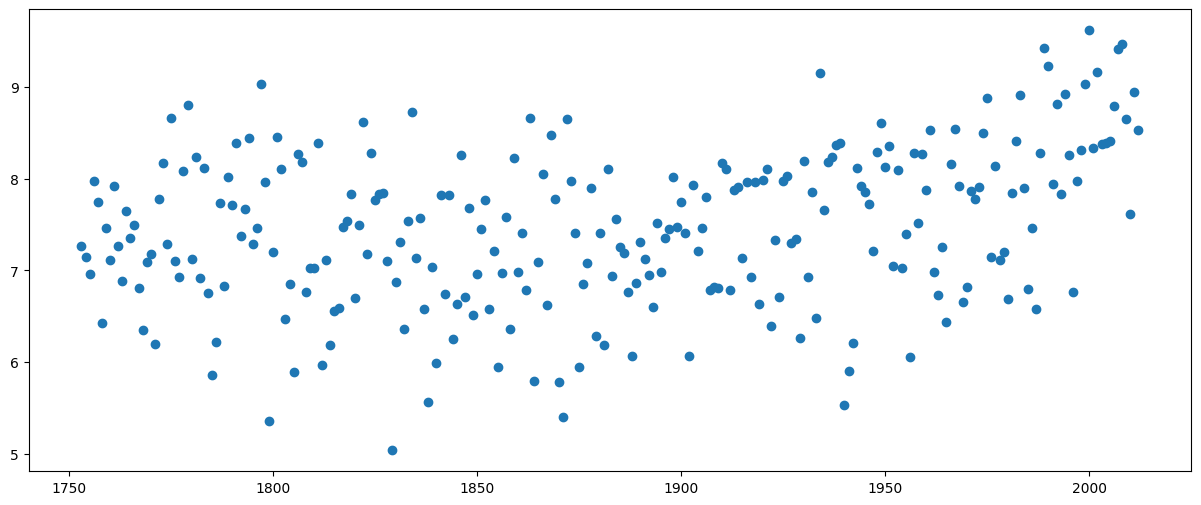

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(years_grouped.index, years_grouped['AverageTemperature'])

# Analysis for July

In [41]:
temps = climate_pol.drop(["AverageTemperatureUncertainty", "Country"], axis=1)
indexes = [i for i in range(1, 3167)]
temps['months'] = [i for i in range(1, 3167)]
temps['index'] = indexes
temps.set_index(['index'], inplace=True) #3166
temps;

In [42]:
temps.loc[temps['months']==3081]

,dt,AverageTemperature,year,months
index,,,,
3081,2006-07-01,22.509,2006,3081


### Extracting months labels 1-12

In [43]:
temps['dt'] = pd.to_datetime(temps['dt'])
temps_m = temps['dt'].dt.month #temps.groupby()

In [44]:
temps_m

index
1       11
2        4
3        5
4        6
5        7
        ..
3162     4
3163     5
3164     6
3165     7
3166     8
Name: dt, Length: 3166, dtype: int64

In [53]:
# # dates = temps['dt']
# #type(temps['dt'])
# tseries = pd.to_datetime(temps['dt'])
# tseries = pd.DatetimeIndex(tseries)
# # tseries[1]
# #monthly = temps.groupby(pd.Grouper(key='dt', freq='M'))

# # for i in range(1, 3167):
# #     dates[i][5:7]


In [ ]:
# tseries

In [70]:
# temps = temps.drop(['dt'], axis=1)

In [45]:
temps['month'] = temps_m
temps_month_bin = temps.drop(['dt', 'months'], axis=1)
temps_month_bin['month']

index
1       11
2        4
3        5
4        6
5        7
        ..
3162     4
3163     5
3164     6
3165     7
3166     8
Name: month, Length: 3166, dtype: int64

### Extracting data for july only (every year)

In [46]:
july = temps_month_bin.loc[temps_month_bin['month']==7]
july['count'] = [i for i in range(0, july.shape[0])];
july = july.drop(['month'], axis=1)
july

/var/folders/hr/8qs4_3tn5tb9cg_2gmnz7pc00000gn/T/ipykernel_2130/3353786873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  july['count'] = [i for i in range(0, july.shape[0])];


,AverageTemperature,year,count
index,,,
5,17.313,1744,0
20,19.258,1750,1
30,18.594,1751,2
45,18.296,1753,3
57,17.120,1754,4
...,...,...,...
3117,19.571,2009,259
3129,21.485,2010,260
3141,18.355,2011,261


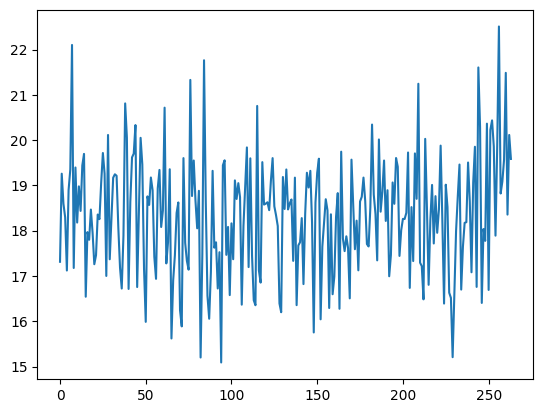

In [20]:
plt.plot(july['count'], july['AverageTemperature'])

### Train - test split

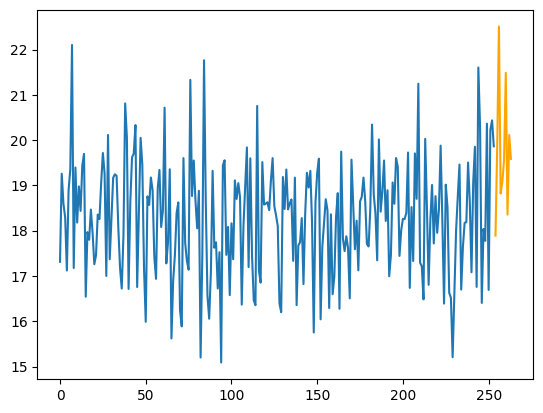

In [26]:
set_size = len(july)
test_size = 10

train = july[:-test_size]
test = july[-test_size:]


plt.plot(train['count'], train['AverageTemperature'], label='Training set')
plt.plot(test['count'], test['AverageTemperature'],label='Test set', color='orange')

# Outliers analysis

In [17]:
from sklearn.svm import OneClassSVM
from numpy import where

In [163]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.01, nu = 0.03) #gamma = 0.01,
# model.fit(july)
model.fit(years_grouped)

OneClassSVM(gamma=0.01, nu=0.03)

In [164]:
out_pred = model.predict(years_grouped)
# y_pred
# filter outlier index
outlier_index = where(out_pred == -1) # filter outlier values
outlier_values = years_grouped.iloc[outlier_index]
outlier_values

,AverageTemperature
year,
1799,5.351917
1829,5.036417
1871,5.400500
1989,9.423417
2000,9.622167
2007,9.418083
2008,9.469167


In [20]:
outlier_count = outlier_values.index.tolist()
len(outlier_count)

7

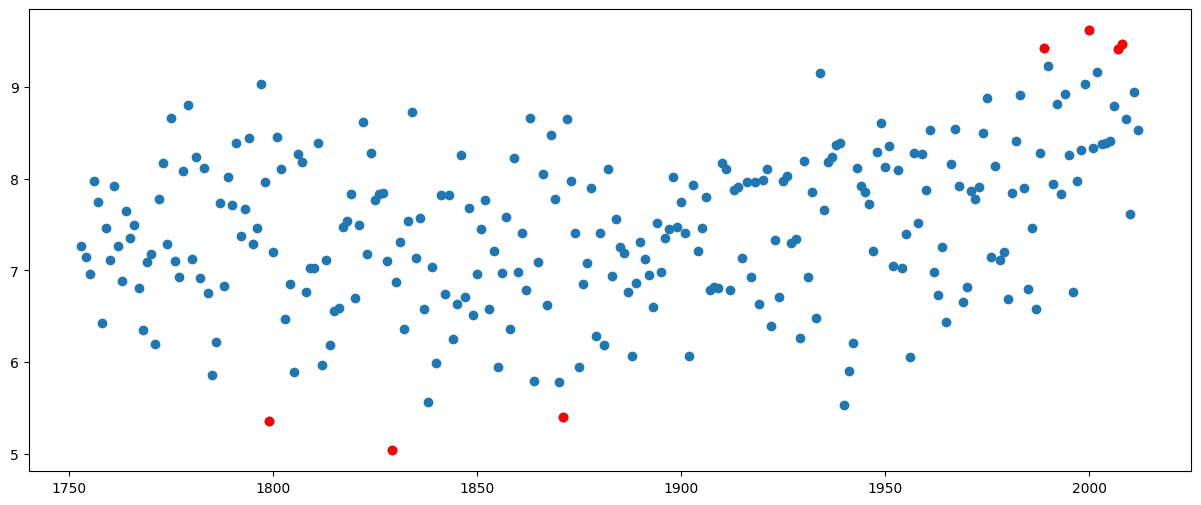

In [21]:
# visualize outputs
# plt.figure(figsize=(15,6))
# plt.scatter(july['count'], july["AverageTemperature"])
# plt.scatter(outlier_values['count'], outlier_values["AverageTemperature"], c = "r")

plt.figure(figsize=(15,6))

plt.scatter(years_grouped.index, years_grouped["AverageTemperature"])
plt.scatter(outlier_values.index, outlier_values["AverageTemperature"], c = "r")



# Train-test split etc

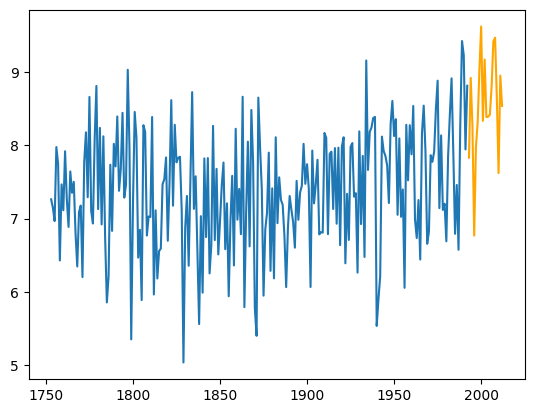

In [75]:
set_size = len(years_grouped)
test_size = 20

X = years_grouped.index
X = X.to_numpy().reshape(-1,1)
y = years_grouped['AverageTemperature']


train = years_grouped[:-test_size]
test = years_grouped[-test_size:]


plt.plot(train.index, train['AverageTemperature'], label='Training set')
plt.plot(test.index, test['AverageTemperature'],label='Test set', color='orange')

In [76]:
X_train = train.index.to_numpy().reshape(-1,1)
y_train = train["AverageTemperature"]
y_train = y_train.to_numpy()

X_test = test.index.to_numpy().reshape(-1, 1)
y_test = test['AverageTemperature']
y_test = y_test.to_numpy()

In [77]:
X_train_weights = [x for x in range(1,251)]
np.size(X_train_weights)

250

# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# X_train = train['count'].to_numpy().reshape(-1,1)
# y_train = train["AverageTemperature"]


lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
lin_reg.intercept_, lin_reg.coef_

# X_test = test['count'].to_numpy().reshape(-1, 1)
# y_test = test['AverageTemperature']


pred_train = lin_reg.predict(X_train)
true_train = y_train

print(np.sqrt(mean_squared_error(true_train, pred_train)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(true_train, pred_train))

0.7948504749871523 0.0906863676223352


In [93]:
# X_new = np.array([0, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273]).reshape(-1,1)
# X_new = np.array([2013,2014,2015,2016,2017,2018,2019,2020,2021, 2022]).reshape(-1,1)

# y_new = lin_reg.predict(X_new)
# y_new
# y_real = np.array([,20.5, 19.2, 19, 18, 19, 18, 18.2, 19.3, 18.9]).reshape(-1,1) #2022 = 18.9; 2021 = 19.3; 2020 = 18.2; 

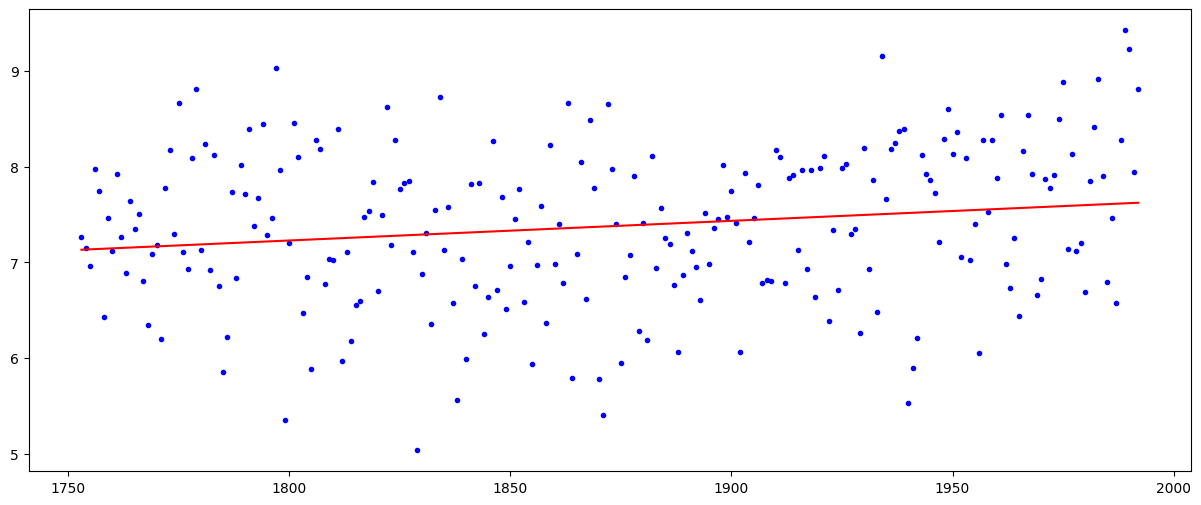

In [79]:
plt.figure(figsize=(15,6))
plt.plot(X_train, y_train, "b.")
plt.plot(X_train, pred_train, "r-")

# plt.plot(X_new, y_real, "r.")

# Polynomial regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
# X_poly_train.shape
# X_poly_test = poly_features.fit_transform(X_test)
X_poly_test = poly_features.fit_transform(X_test)

In [81]:
poly_reg = LinearRegression(fit_intercept=True)
poly_reg.fit(X_poly_train, y_train)
poly_reg.intercept_, poly_reg.coef_
poly_pred_train = poly_reg.predict(X_poly_train)

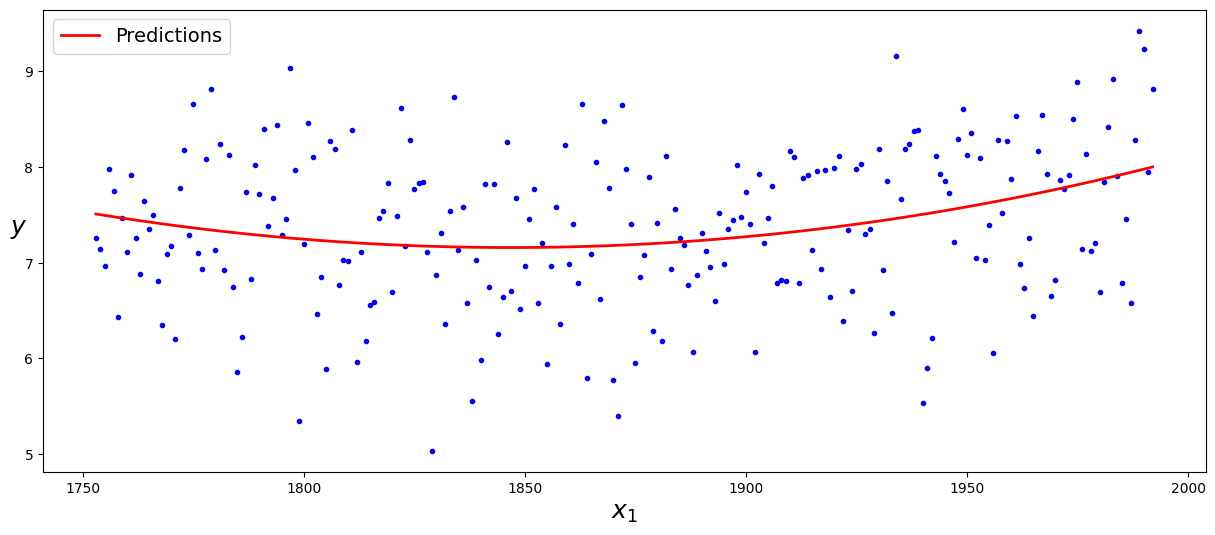

In [82]:
# X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.figure(figsize=(15,6))

# X_new_poly = poly_features.transform(X_new)
# y_new = lin_reg.predict(X_new_poly)

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, poly_pred_train, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [83]:
# print(pred, true)
print(np.sqrt(mean_squared_error(y_train, poly_pred_train)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(y_train, poly_pred_train))

0.7761618937093525 0.0887158545225702


# SVR

In [84]:
from sklearn.svm import SVR

In [85]:
svr = SVR(kernel='rbf')

In [87]:
svr.fit(X_train, y_train);

In [88]:
svr_pred_train = svr.predict(X_train)

In [89]:
print(np.sqrt(mean_squared_error(y_train, svr_pred_train)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(y_train, svr_pred_train))

0.7814850774691733 0.08792218825056418


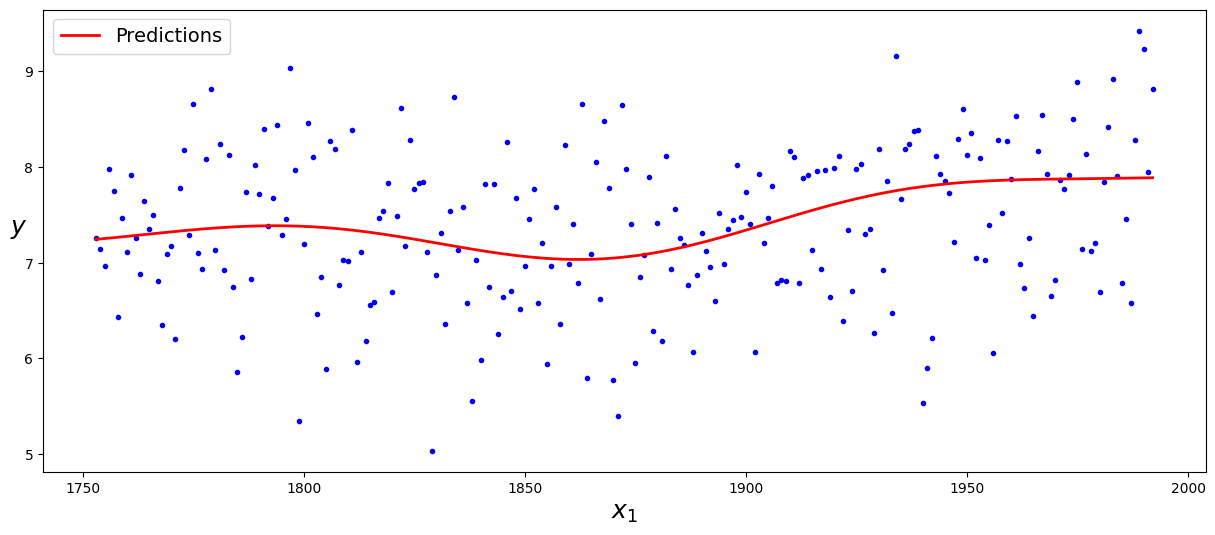

In [90]:
plt.figure(figsize=(15,6))

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, svr_pred_train, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Fine tuning hyperparameters

In [91]:
from sklearn.model_selection import GridSearchCV # Grid search with cross-validatio

- No hyperparameters for linear regression to try
- For polynomial regression I've checked by hand the only usable parameter: degree of polynomial 

In [92]:
svr = SVR()

In [93]:
svr_params = {
    'kernel'   : ['rbf', 'sigmoid'],
    'gamma'    : ['scale', 'auto'],
    'tol'      : [0.001, 0.0001, 0.01],
    'C'        : [1.0, 2.0, 0.5, 3.0],
    'epsilon'  : [0.1, 0.3, 0.5],
    'shrinking': [False, True]
}

svr_grid = GridSearchCV(svr, svr_params)

In [94]:
svr_grid.fit(X_train, y_train)


# Get the best models with the best hyperparameters
best_svr = svr_grid.best_estimator_
best_svr

SVR(C=2.0, epsilon=0.3, shrinking=False, tol=0.01)

In [95]:
svr_grid.best_params_

{'C': 2.0,
 'epsilon': 0.3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': False,
 'tol': 0.01}

In [96]:
# Retrain the best models on all the training set
best_svr.fit(X_train, y_train)

SVR(C=2.0, epsilon=0.3, shrinking=False, tol=0.01)

In [97]:
best_svr_pred = best_svr.predict(X_train)

In [98]:
print(np.sqrt(mean_squared_error(y_train, best_svr_pred)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(y_train, best_svr_pred))

0.7779512314147399 0.08810014332895996


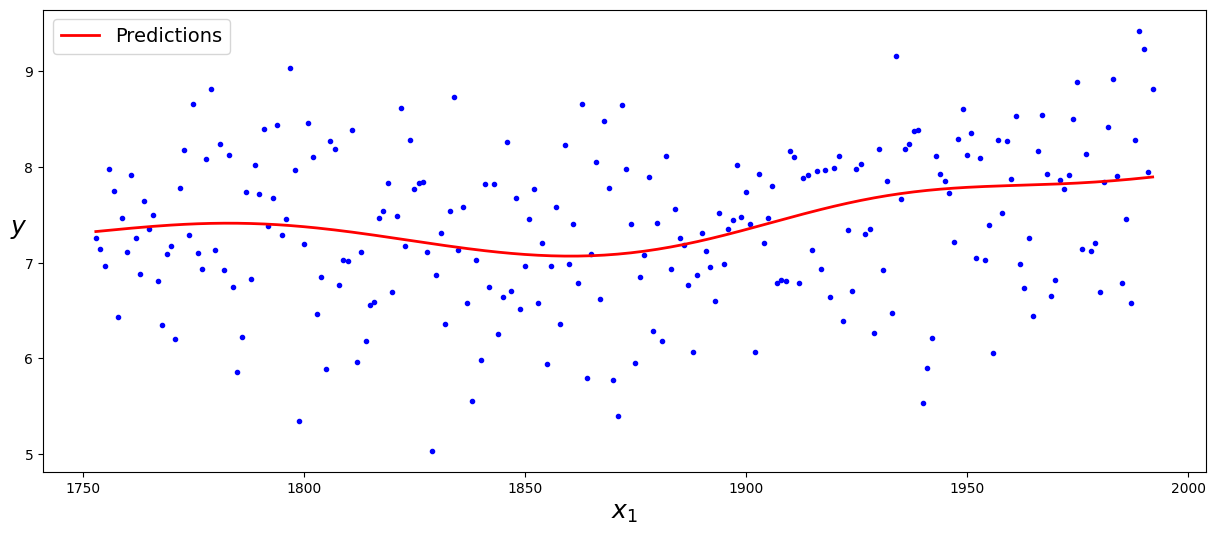

In [99]:
plt.figure(figsize=(15,6))

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, best_svr_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Adding weights to samples

In [101]:
X_train_weights = [x for x in range(1,241)]
len(X_train_weights)

240

In [113]:
X_train_weights2 = np.array(X_train_weights)

X_train_weights2[:50] = 1
X_train_weights2[50:100] = 2
X_train_weights2[100:150] = 4
X_train_weights2[150:200] = 6
X_train_weights2[200:240] = 8
# X_train_weights2

In [126]:
svr_w = SVR(C=2.0, epsilon=0.3, shrinking=False, tol=0.01)
svr_w.fit(X_train, y_train, sample_weight=X_train_weights2)

SVR(C=2.0, epsilon=0.3, shrinking=False, tol=0.01)

In [115]:
svr_pred_w = svr_w.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, svr_pred_w)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(y_train, svr_pred_w))

0.7744275275299911 0.08831788357928423


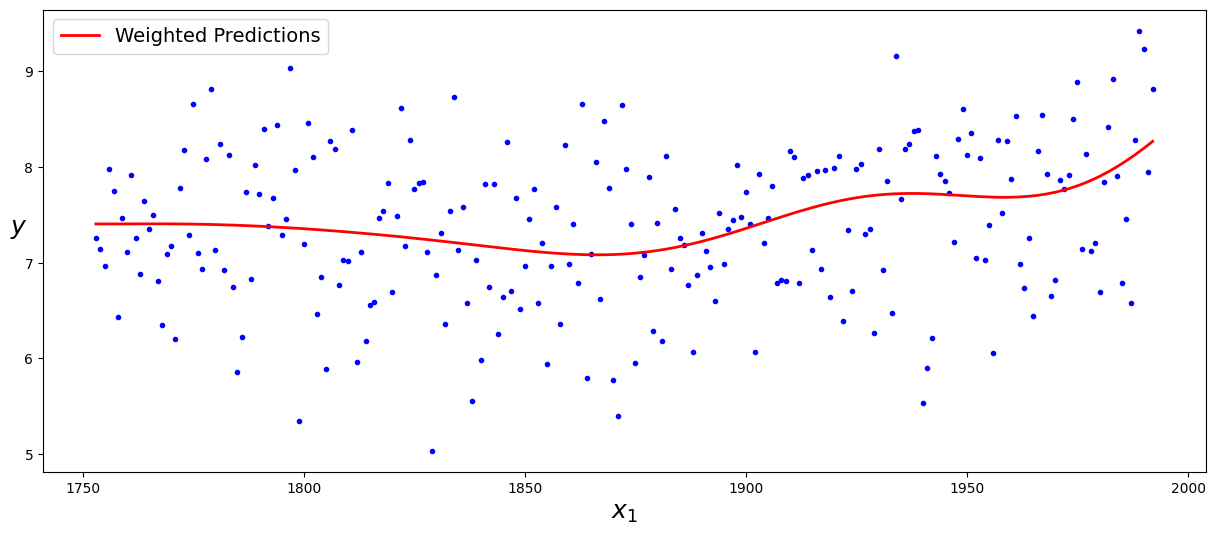

In [116]:
plt.figure(figsize=(15,6))

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, svr_pred_w, "r-", linewidth=2, label="Weighted Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

In [117]:
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly_train = poly_features.fit_transform(X_train)

poly_reg_w = LinearRegression(fit_intercept=True)
poly_reg_w.fit(X_poly_train, y_train, sample_weight=X_train_weights2)
poly_reg_w.intercept_, lin_reg.coef_
poly_pred_train_w = poly_reg_w.predict(X_poly_train)

print(np.sqrt(mean_squared_error(y_train, poly_pred_train_w)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(y_train, poly_pred_train_w))

0.7762852671101658 0.08855144534298023


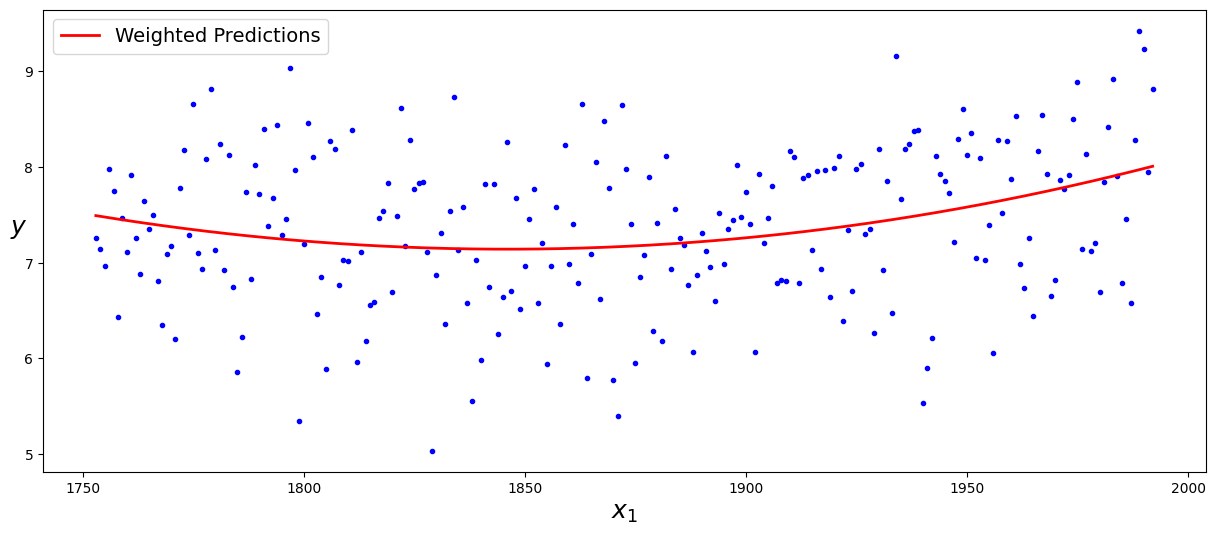

In [118]:
plt.figure(figsize=(15,6))

# X_new_poly = poly_features.transform(X_new)
# y_new = lin_reg.predict(X_new_poly)

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, poly_pred_train_w, "r-", linewidth=2, label="Weighted Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [119]:
lin_reg_w = LinearRegression(fit_intercept=True)
lin_reg_w.fit(X_train, y_train, sample_weight=X_train_weights2)
# lin_reg.intercept_, lin_reg.coef_

pred_train_w = lin_reg_w.predict(X_train)
true_train = y_train

print(np.sqrt(mean_squared_error(true_train, pred_train)), #error of about 2 Celsius degrees
mean_absolute_percentage_error(true_train, pred_train))

0.7948504749871523 0.0906863676223352


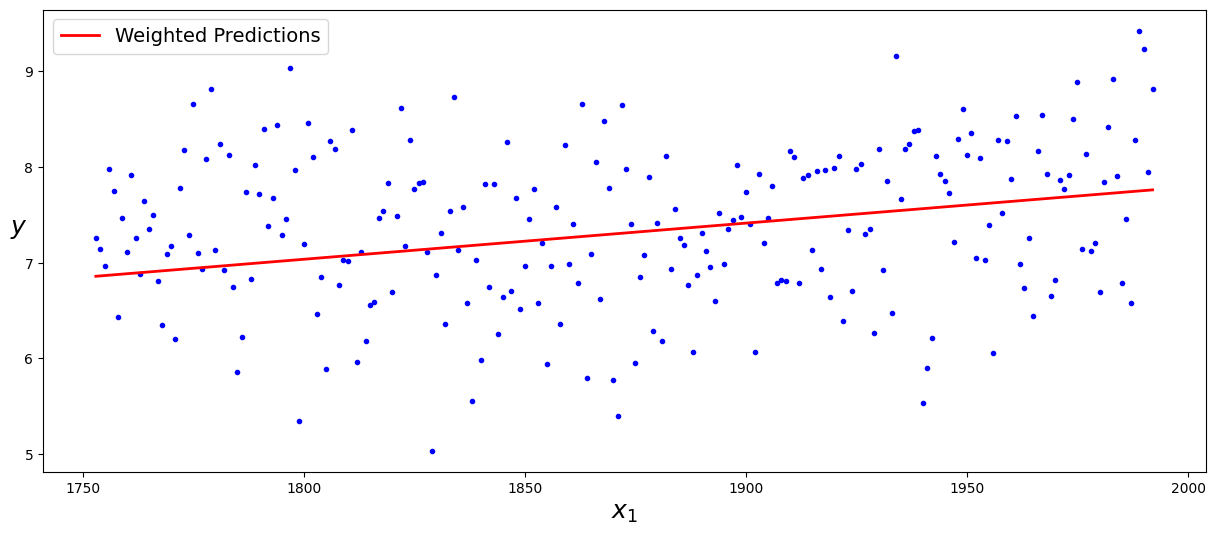

In [120]:
plt.figure(figsize=(15,6))

plt.plot(X_train, y_train, "b.")
plt.plot(X_train, pred_train_w, "r-", linewidth=2, label="Weighted Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Testing

In [121]:
lin_reg_test = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, lin_reg_test))
print(rmse_lin, 
mean_absolute_percentage_error(y_test, lin_reg_test),'\n')

poly_reg_test = poly_reg.predict(X_poly_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, poly_reg_test))
print(rmse_poly, 
mean_absolute_percentage_error(y_test, poly_reg_test),'\n')

best_svr_test = best_svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, best_svr_test))
print(rmse_svr, 
mean_absolute_percentage_error(y_test, best_svr_test),'\n')

lin_reg_w_test = lin_reg_w.predict(X_test)
rmse_lin_w = np.sqrt(mean_squared_error(y_test, lin_reg_w_test)) 
print(rmse_lin_w, 
mean_absolute_percentage_error(y_test, lin_reg_w_test),'\n')

poly_reg_w_test = poly_reg_w.predict(X_poly_test)
rmse_poly_w = np.sqrt(mean_squared_error(y_test, poly_reg_w_test)) 
print(rmse_poly_w, 
mean_absolute_percentage_error(y_test, poly_reg_w_test),'\n')

svr_w_test = svr_w.predict(X_test)
rmse_svr_w = np.sqrt(mean_squared_error(y_test, svr_w_test))
print(rmse_svr_w, 
mean_absolute_percentage_error(y_test, svr_w_test),'\n')

1.1182552921023752 0.11284777112970468 

0.7704590385631813 0.07282557294704757 

0.8843839325055969 0.08603263854134227 

0.9939935584899682 0.09873428951610087 

0.7648117981653195 0.07213083349890885 

0.6562790115141164 0.0635552773874117 



<BarContainer object of 6 artists>

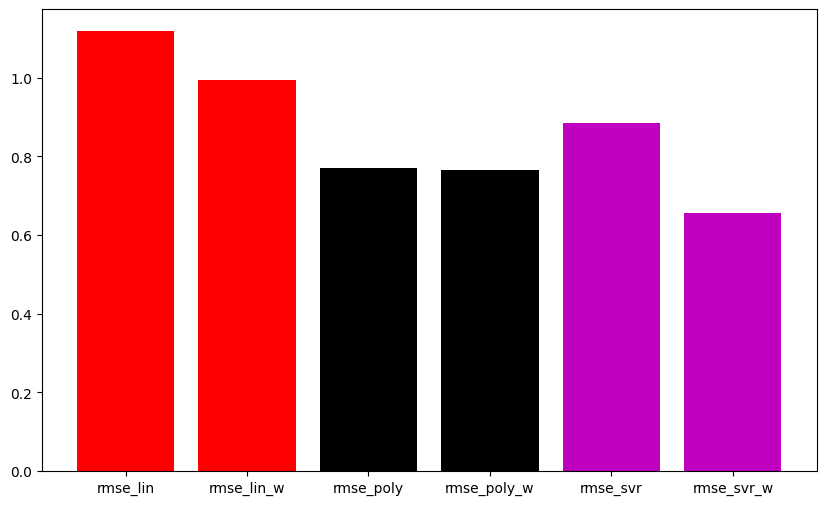

In [122]:
plt.figure(figsize=(10,6))
plt.bar(x=[1,2,3,4,5,6], height=[rmse_lin, rmse_lin_w,  rmse_poly, rmse_poly_w, rmse_svr, rmse_svr_w], tick_label=['rmse_lin', 'rmse_lin_w',  'rmse_poly', 'rmse_poly_w', 'rmse_svr', 'rmse_svr_w'], color=['r', 'r', 'k', 'k', 'm', 'm']
        
       
       )

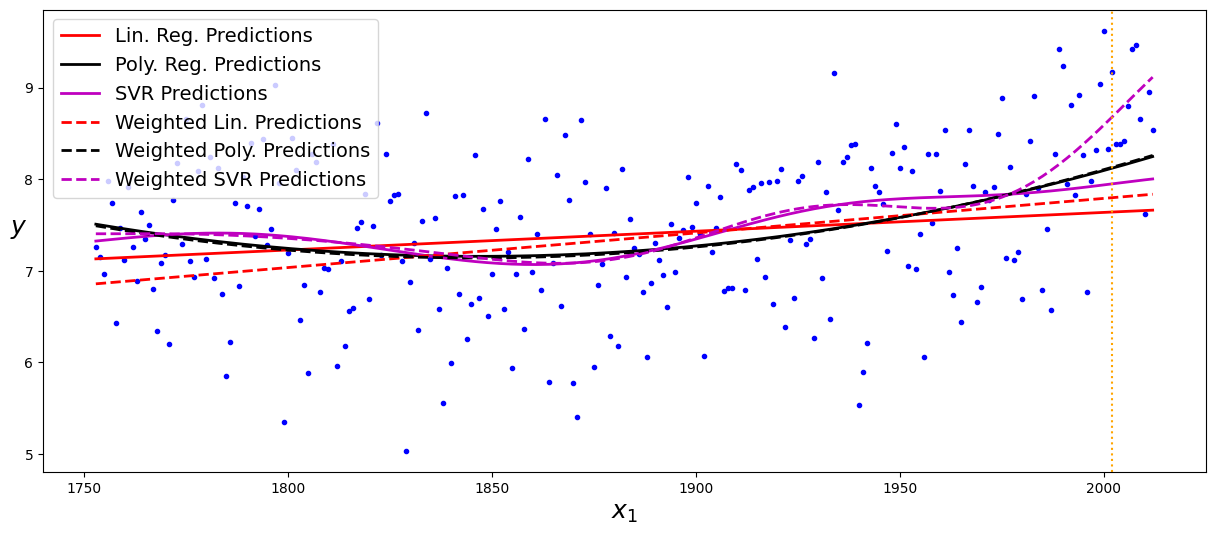

In [123]:
plt.figure(figsize=(15,6))

plt.plot(X, y, "b.")
plt.plot(X, np.append(pred_train, lin_reg_test), "r-", linewidth=2, label="Lin. Reg. Predictions")

plt.plot(X, np.append(poly_pred_train, poly_reg_test), "k-", linewidth=2, label="Poly. Reg. Predictions")

plt.plot(X, np.append(best_svr_pred, best_svr_test), "m-", linewidth=2, label="SVR Predictions")

plt.plot(X, np.append(pred_train_w, lin_reg_w_test), "r--", linewidth=2, label="Weighted Lin. Predictions")

plt.plot(X, np.append(poly_pred_train_w, poly_reg_w_test), "k--", linewidth=2, label="Weighted Poly. Predictions")

plt.plot(X, np.append(svr_pred_w, svr_w_test), "m--", linewidth=2, label="Weighted SVR Predictions")

plt.axvline(x = 2002, color = 'orange', ls=':')

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

In [129]:
svr = best_svr.predict(X)
print(np.sqrt(mean_squared_error(y, svr)), 
mean_absolute_percentage_error(y, svr),'\n')

svr_w2 = svr_w.predict(X)
print(np.sqrt(mean_squared_error(y, svr_w2)), 
mean_absolute_percentage_error(y, svr_w2),'\n')

0.7866497784710212 0.08794110449914323 

0.7659864472444631 0.08641306771837097 



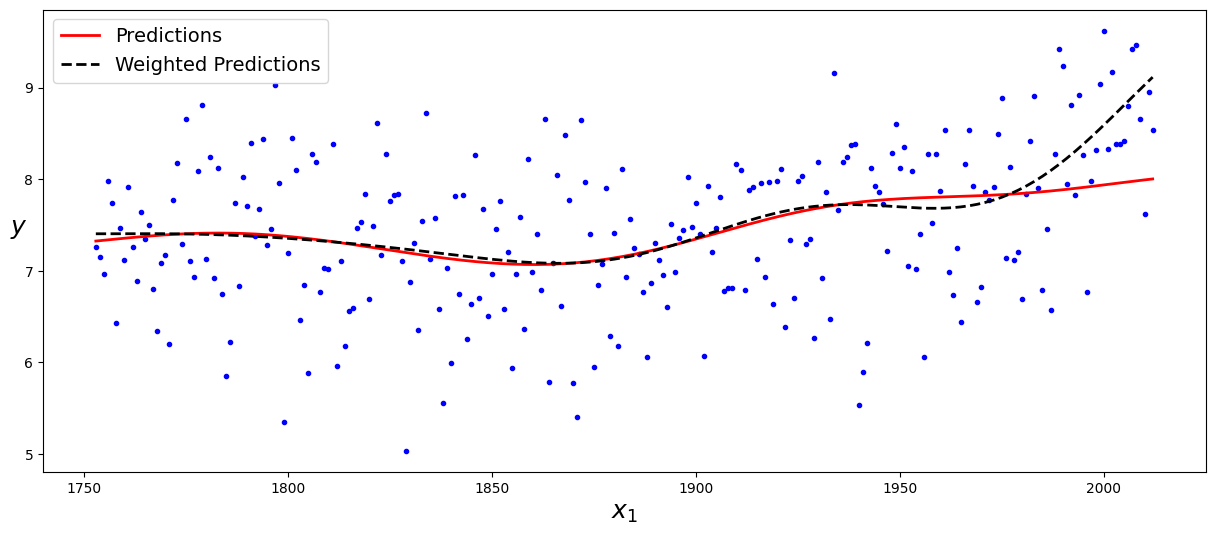

In [132]:
plt.figure(figsize=(15,6))

plt.plot(X, y, "b.")


plt.plot(X, svr, "r-", linewidth=2, label="Predictions")
plt.plot(X, svr_w2, "k--", linewidth=2, label="Weighted Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Adding temperatures for years 2014-2022

In [169]:
# average yearly temperatures since 2013

X_new = np.array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
X_new = X_new.reshape(-1,1)
y_new = np.array([9.5, 9.7, 9.2, 10.0, 9.8, 10.2, 9.9, 8.75, 9.5])
y_new = y_new.reshape(-1,1)


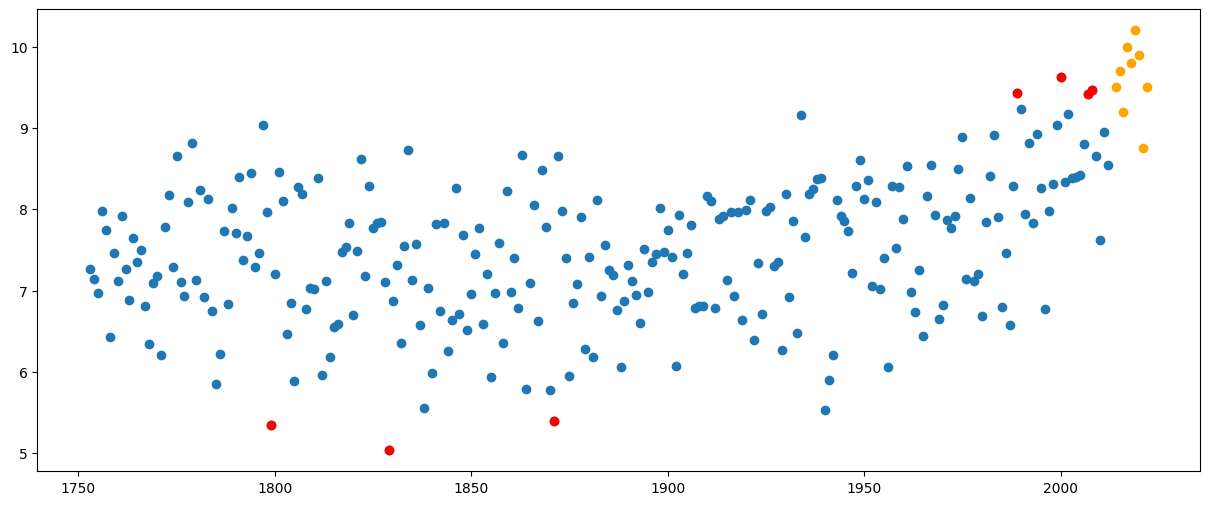

In [139]:
plt.figure(figsize=(15,6))

plt.scatter(years_grouped.index, years_grouped["AverageTemperature"])
plt.scatter(outlier_values.index, outlier_values["AverageTemperature"], c = "r")
plt.scatter(X_new, y_new, c = 'orange')

In [143]:
X_test_new = np.append(X_test, X_new)
X_test_new = X_test_new.reshape(-1,1)
y_test_new = np.append(y_test, y_new)

In [145]:
svr_new = svr_w.predict(X_test_new)
print(np.sqrt(mean_squared_error(y_test_new, svr_new)))

0.6146190683563358


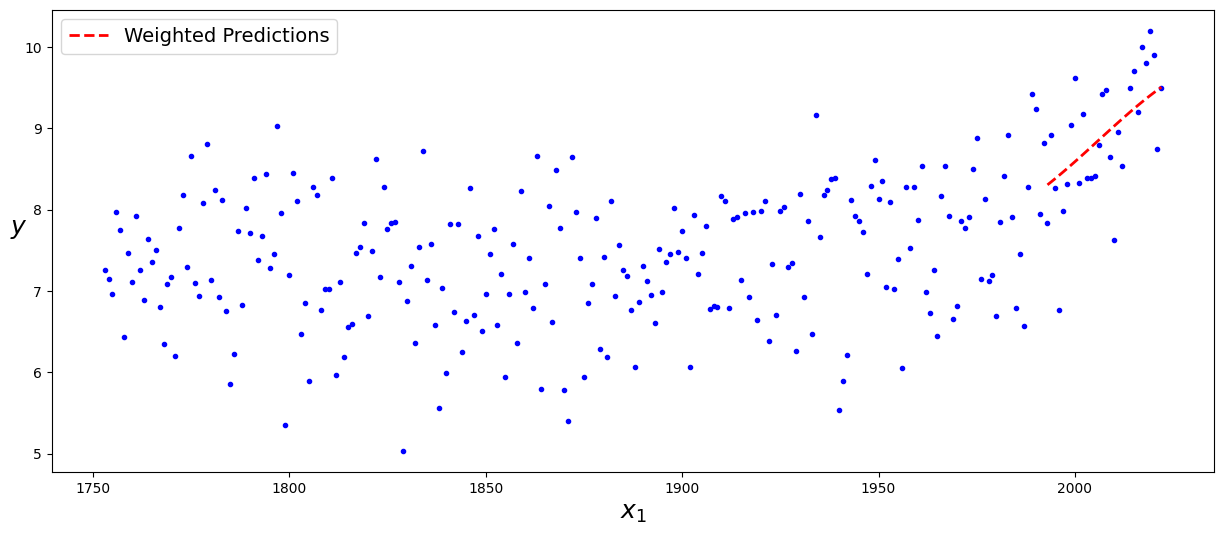

In [148]:
plt.figure(figsize=(15,6))

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "b.")


plt.plot(X_test_new, svr_new, "r--", linewidth=2, label="Weighted Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()